In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [3]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Continuous Data\adjusted_Limits.csv")

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

425_pct_Al       M_Value    C4_pct_Eth    C4_pct_H2O    C4_pct_Hex  \
count  66283.000000  66283.000000  66283.000000  66283.000000  66283.000000   
mean       4.321005      3.637914      1.446363     21.006658      0.546529   
std      109.673057      0.735324      2.707584      4.430069      0.883020   
min    -9730.860000      0.571967      0.001000      0.057000      0.000000   
25%        5.991730      3.508385      0.682053     18.354550      0.333132   
50%        6.136750      3.598720      1.297090     20.862100      0.431821   
75%        6.292715      3.700190      1.761290     23.014350      0.534672   
max        8.058320     30.115400     77.165000     95.818000     13.392400   

            Butanol  HydWtr_pct_Ammonia   HydWtr_Na2O       DI55152  \
count  66283.000000        66283.000000  66283.000000  66283.000000   
mean      11.586813            0.987679      1.013275      0.943163   
std       15.633772            0.205286      4.383488      0.042725   
min        0.000000            0.063109     -0.256120      0.000000   
25%        3.564480            0.877701      0.413891      0.914872   
50%        5.750000            0.946479      0.645917      0.938676   
75%       11.553300            1.049065      0.998015      0.964658   
max       99.950000            3.744840    279.492000      1.070140   

            FC55003       FC55552       FC55569      FFC55553      FFC55555  \
count  6.628300e+04  66283.000000  66283.000000  66283.000000  66283.000000   
mean   5.948169e+03  35335.644651   6614.664076      0.989771      0.773587   
std    1.035937e+03   5517.359209    483.519515      0.060144      0.027327   
min    1.930000e-17   6376.690000      0.000000      0.042564      0.000000   
25%    5.375710e+03  33945.450000   6340.610000      0.969245      0.759275   
50%    5.952690e+03  37584.500000   6575.010000      0.991466      0.777151   
75%    6.531295e+03  38956.850000   6827.645000      1.017050      0.789887   
max    1.470590e+04  52000.000000  10503.000000      1.475490      1.000000   

            LC55555       PI55004       TC55552       TC55555       TI55021  
count  66283.000000  66283.000000  66283.000000  66283.000000  66283.000000  
mean      58.582882      2.350522    167.706113    181.017221    223.974044  
std       10.515277      1.329034     15.905350      1.822726     10.913882  
min        0.000000      0.000000     98.687500    100.587000      0.000000  
25%       49.861550      1.314275    155.330500    179.968000    217.862500  
50%       60.144700      2.075940    171.259000    180.135000    221.062000  
75%       67.722700      3.175030    180.155000    182.042000    225.211000  
max       99.818500     12.531800    213.521000    239.332000    344.636000

In [4]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 20


In [5]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [6]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date                  datetime64[ns]
425_pct_Al                   float64
M_Value                      float64
C4_pct_Eth                   float64
C4_pct_H2O                   float64
C4_pct_Hex                   float64
Butanol                      float64
HydWtr_pct_Ammonia           float64
HydWtr_Na2O                  float64
DI55152                      float64
FC55003                      float64
FC55552                      float64
FC55569                      float64
FFC55553                     float64
FFC55555                     float64
LC55555                      float64
PI55004                      float64
TC55552                      float64
TC55555                      float64
TI55021                      float64
dtype: object


Skipping datetime column: Date


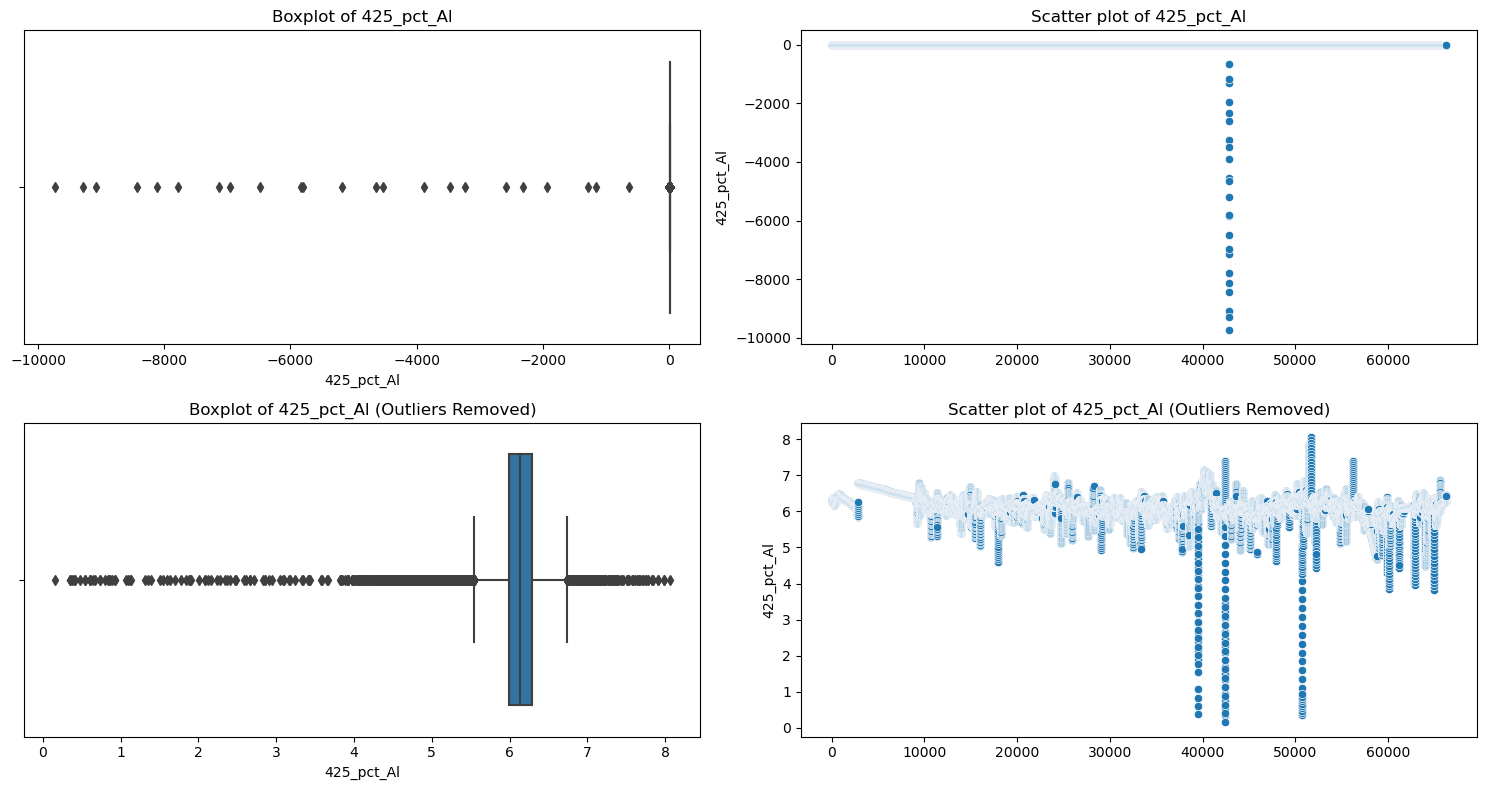

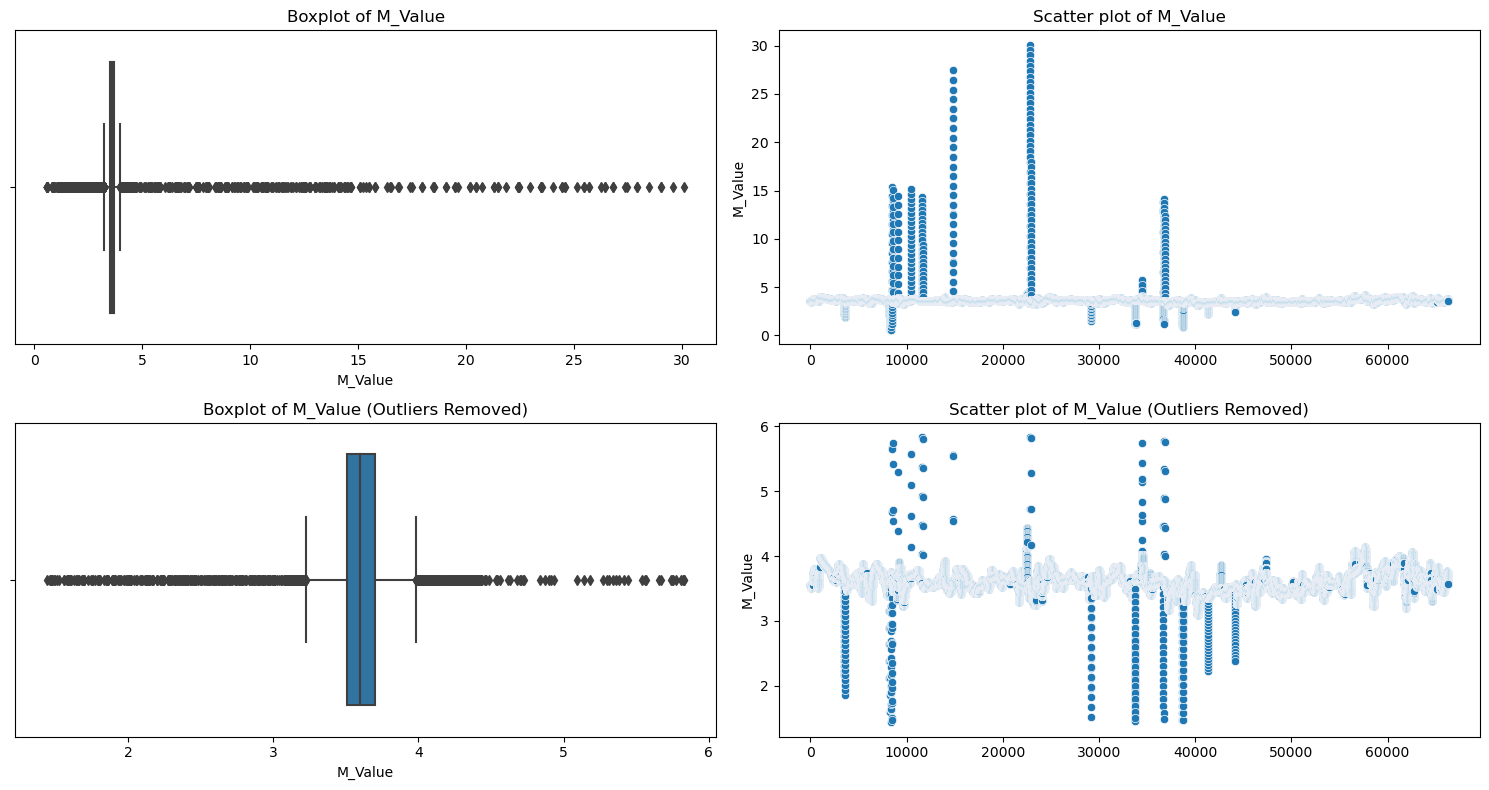

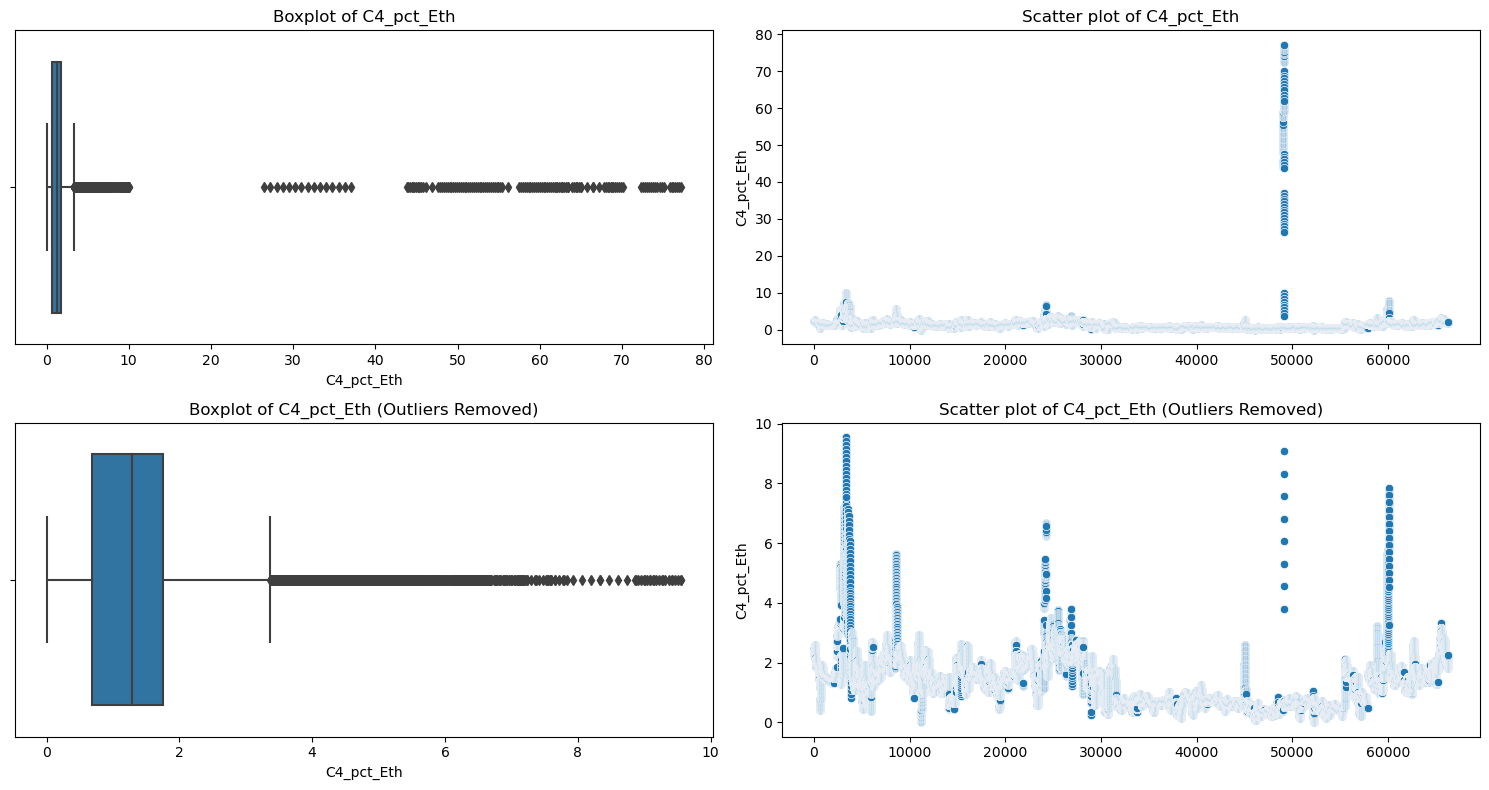

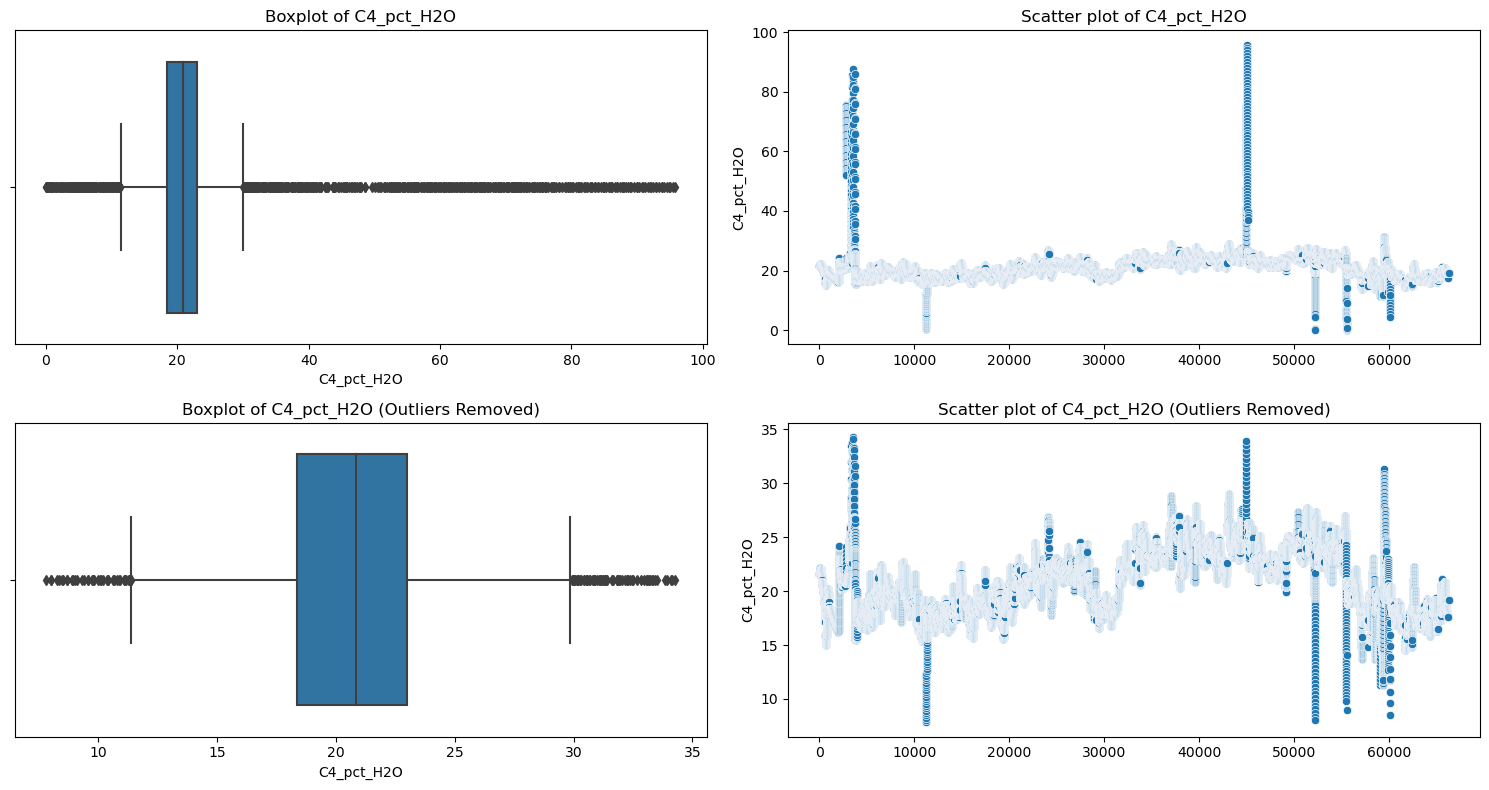

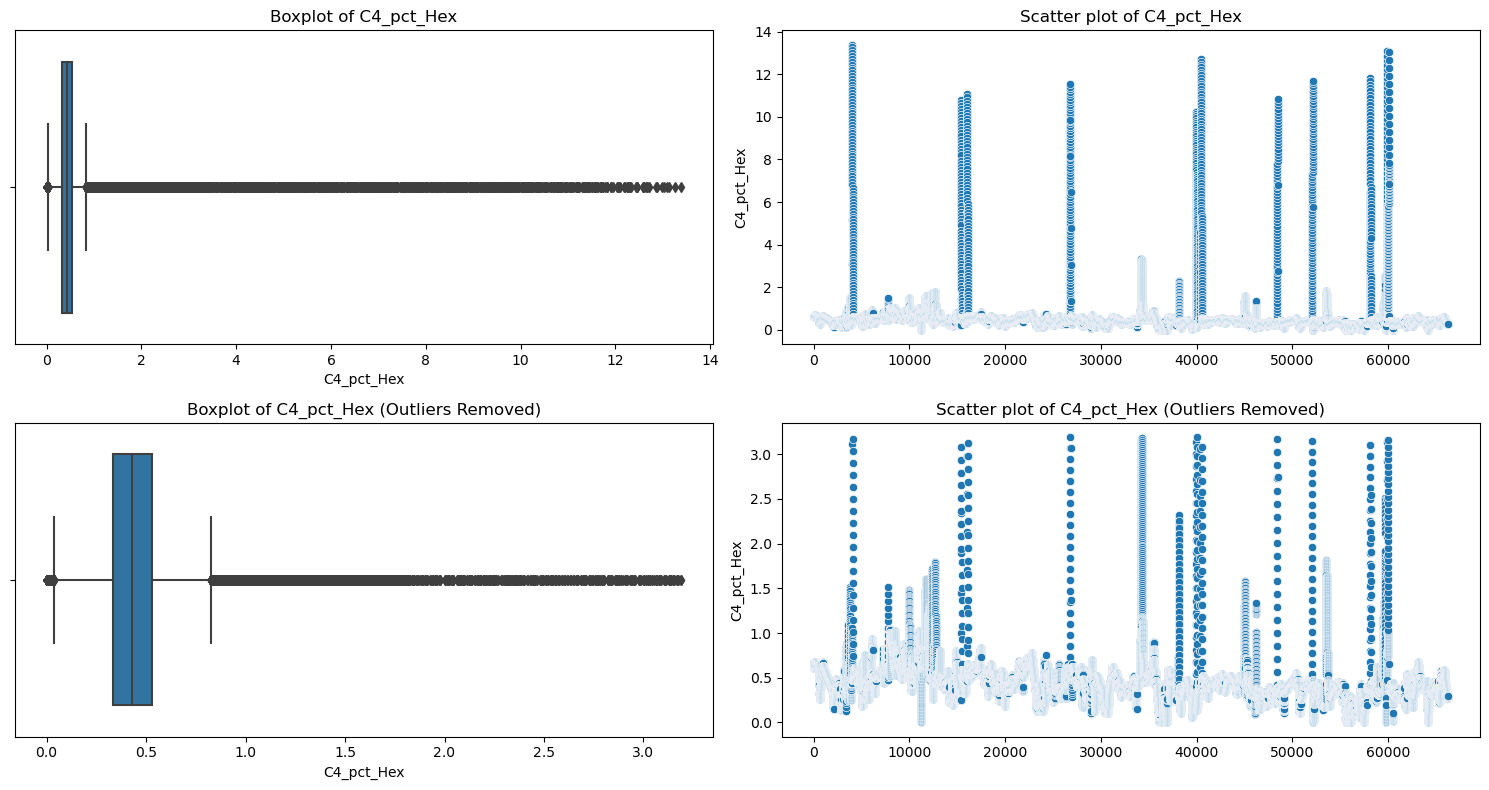

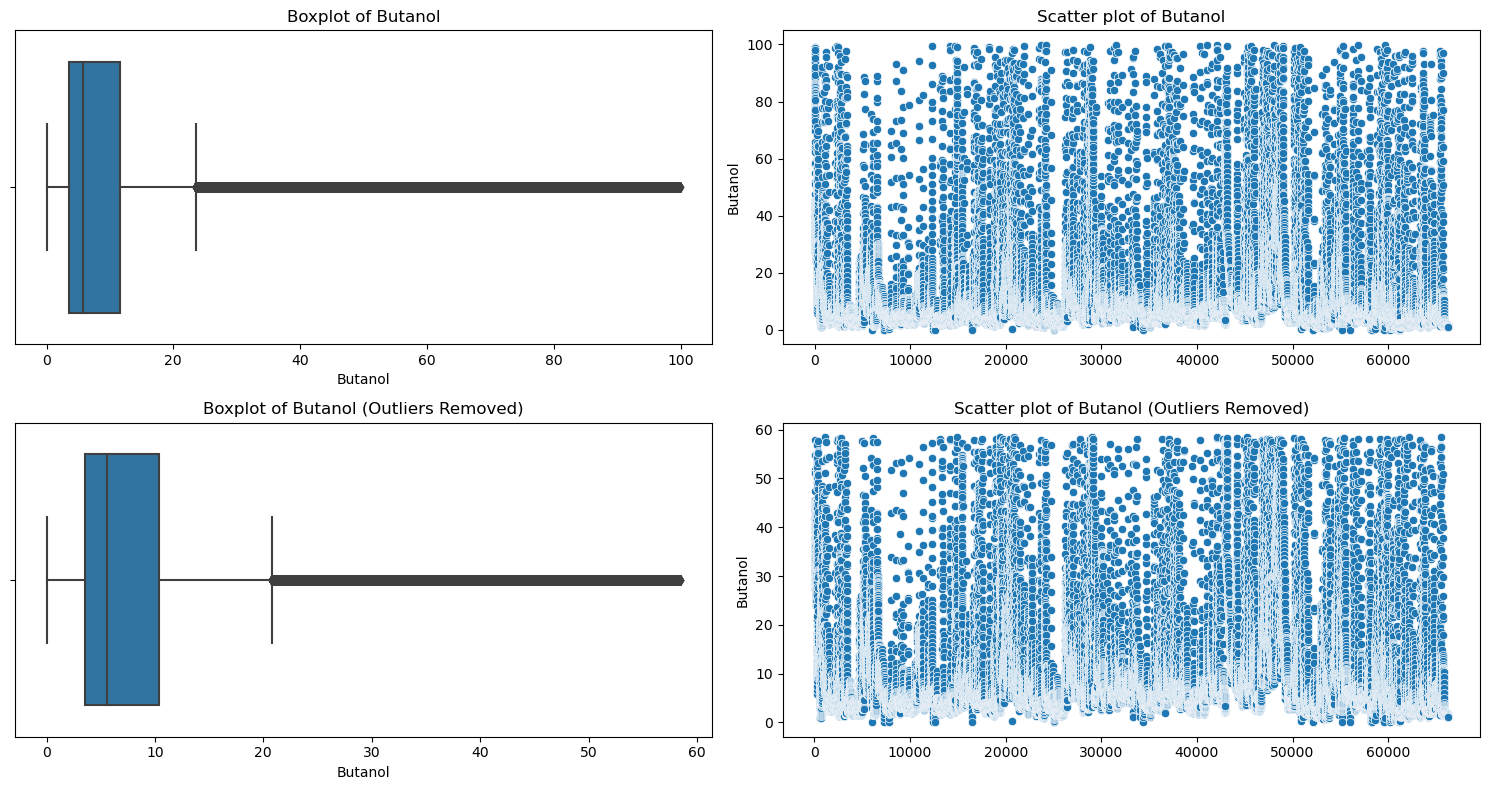

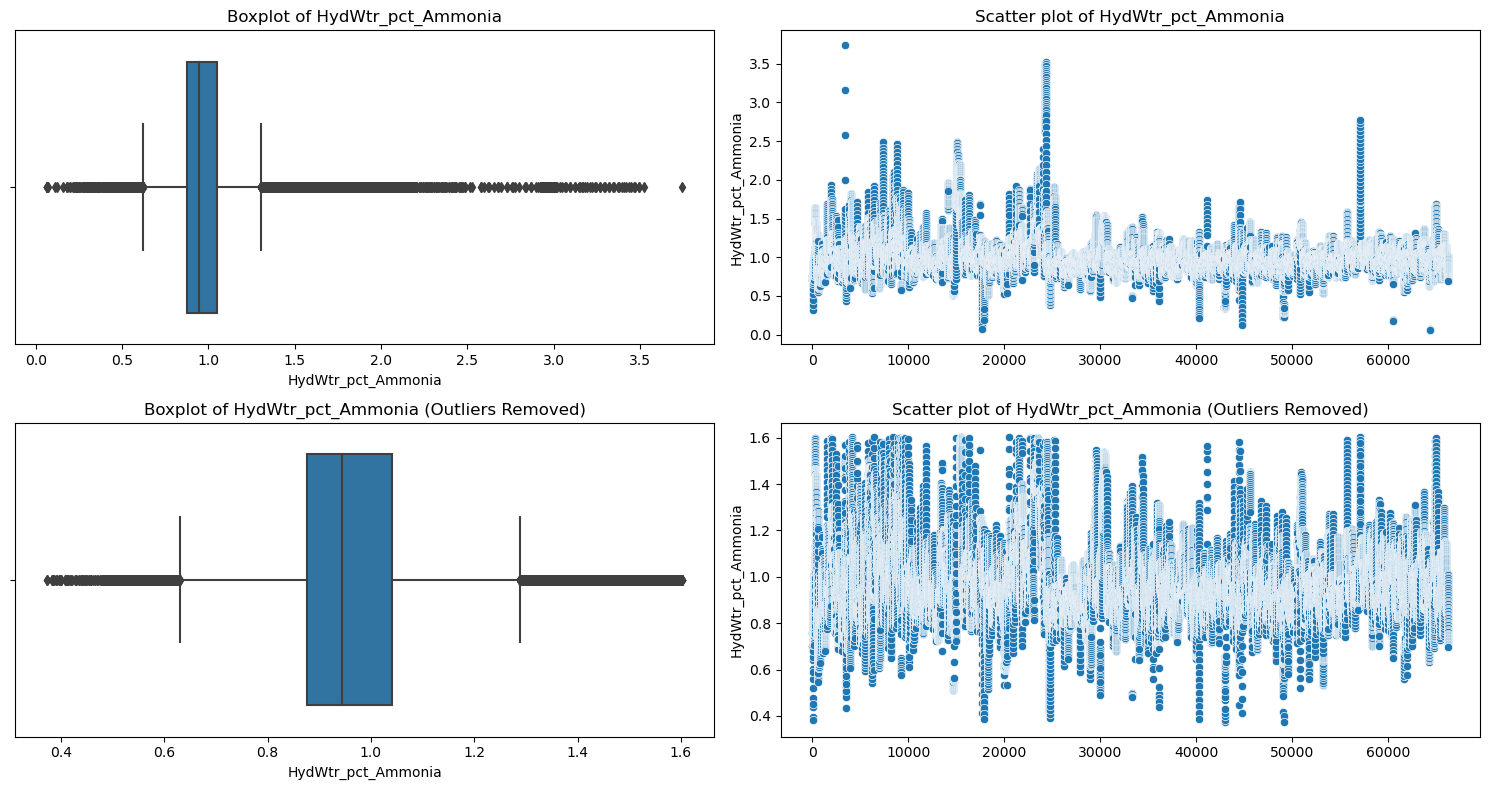

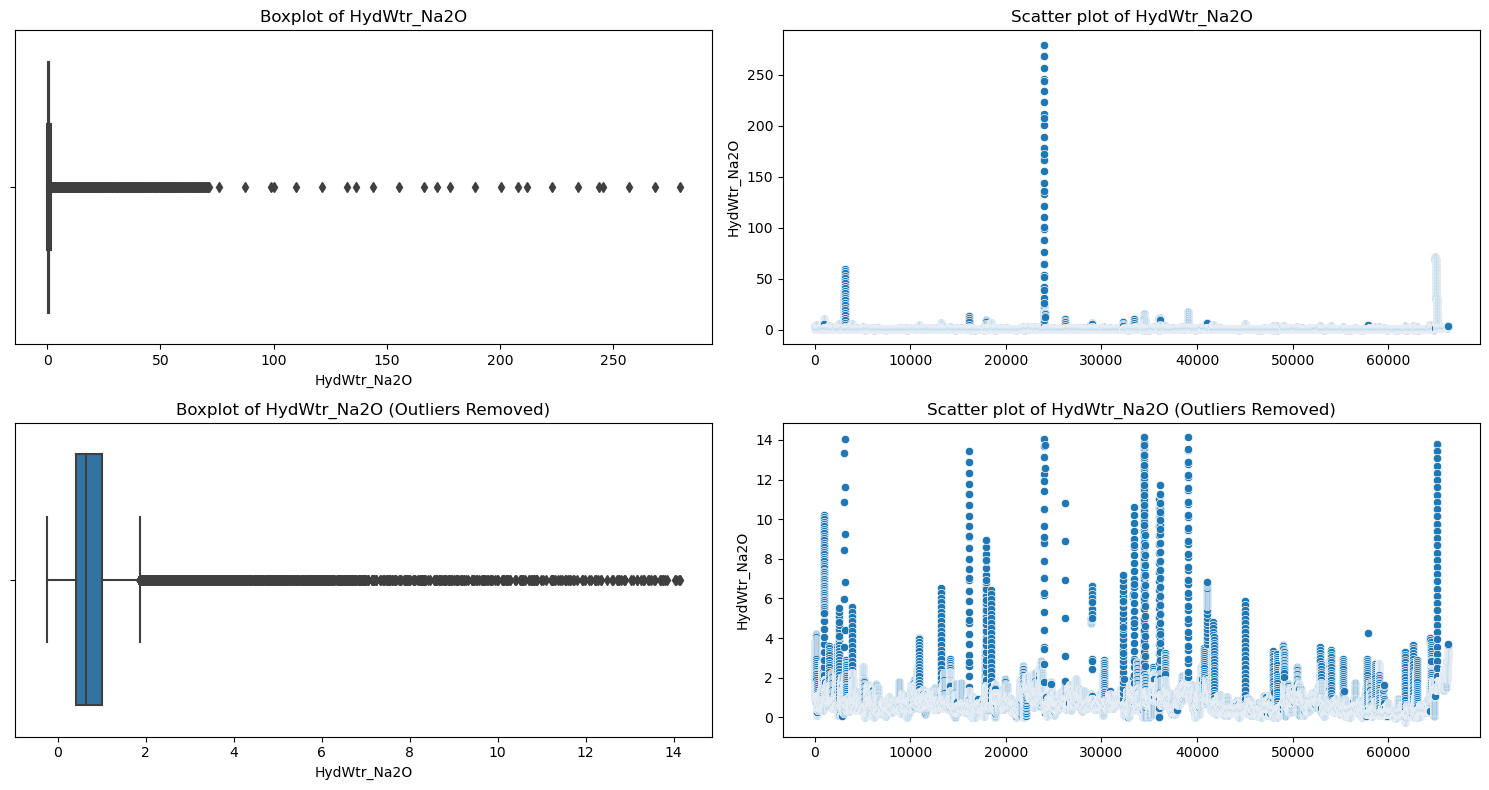

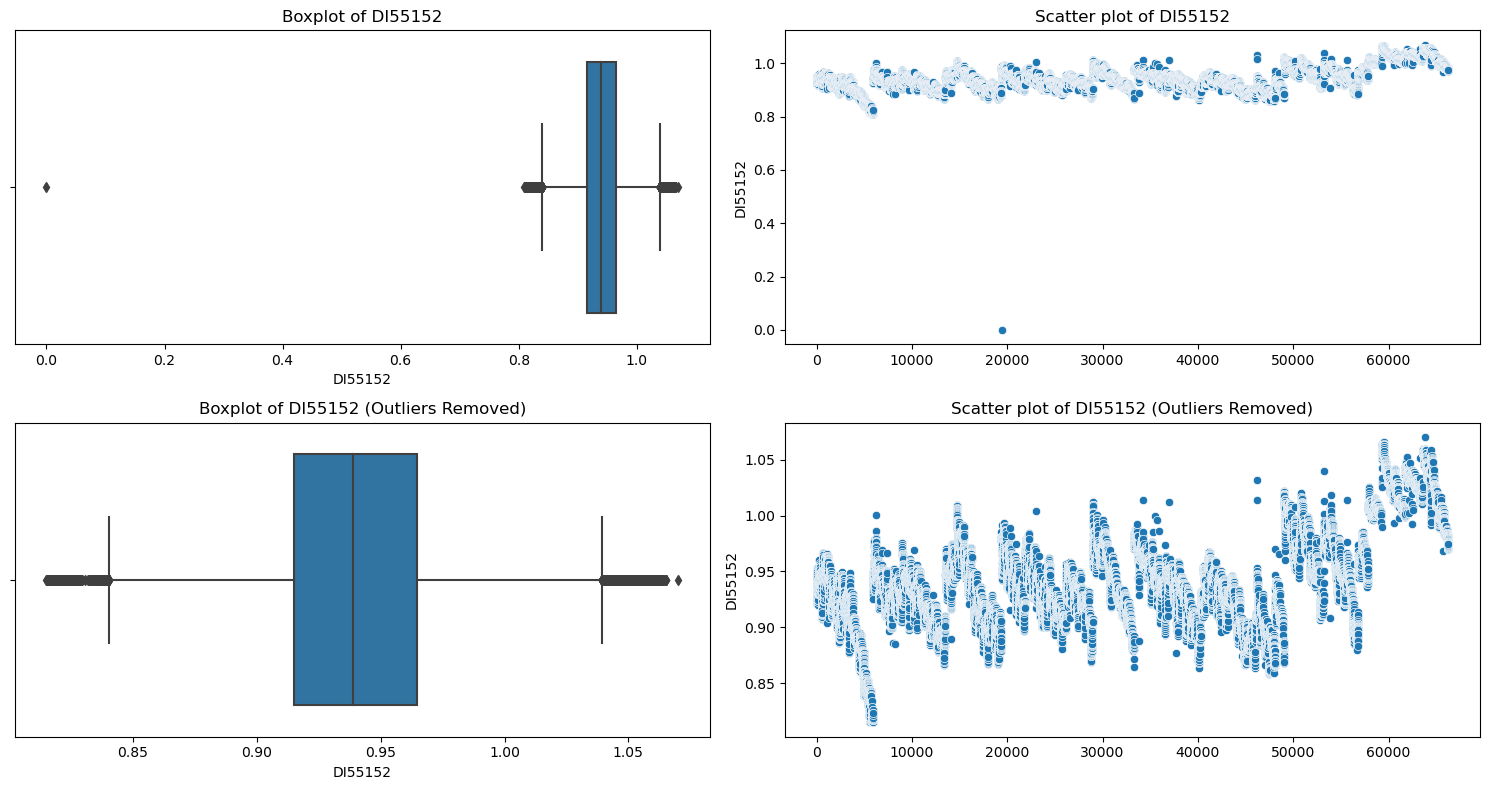

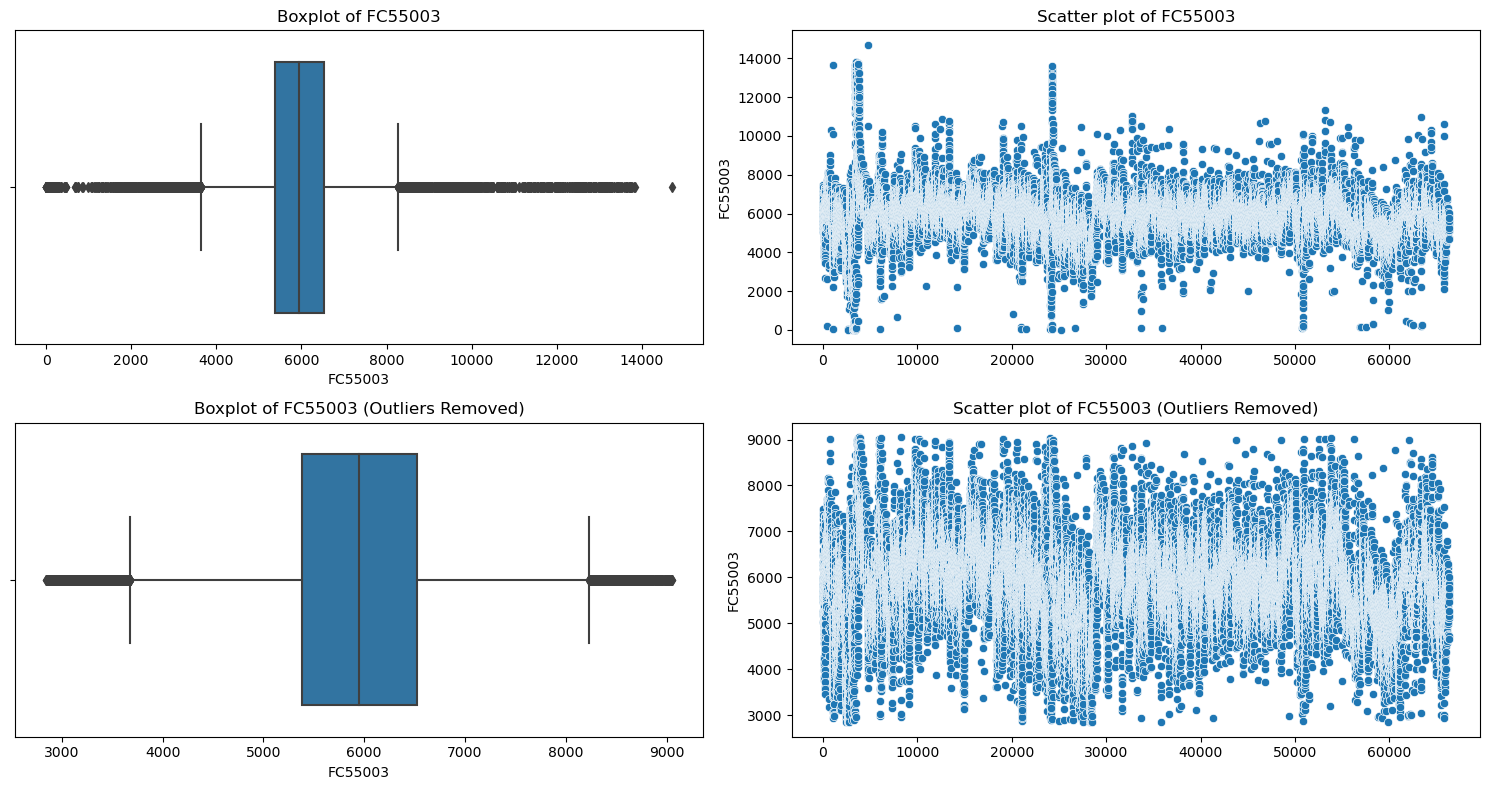

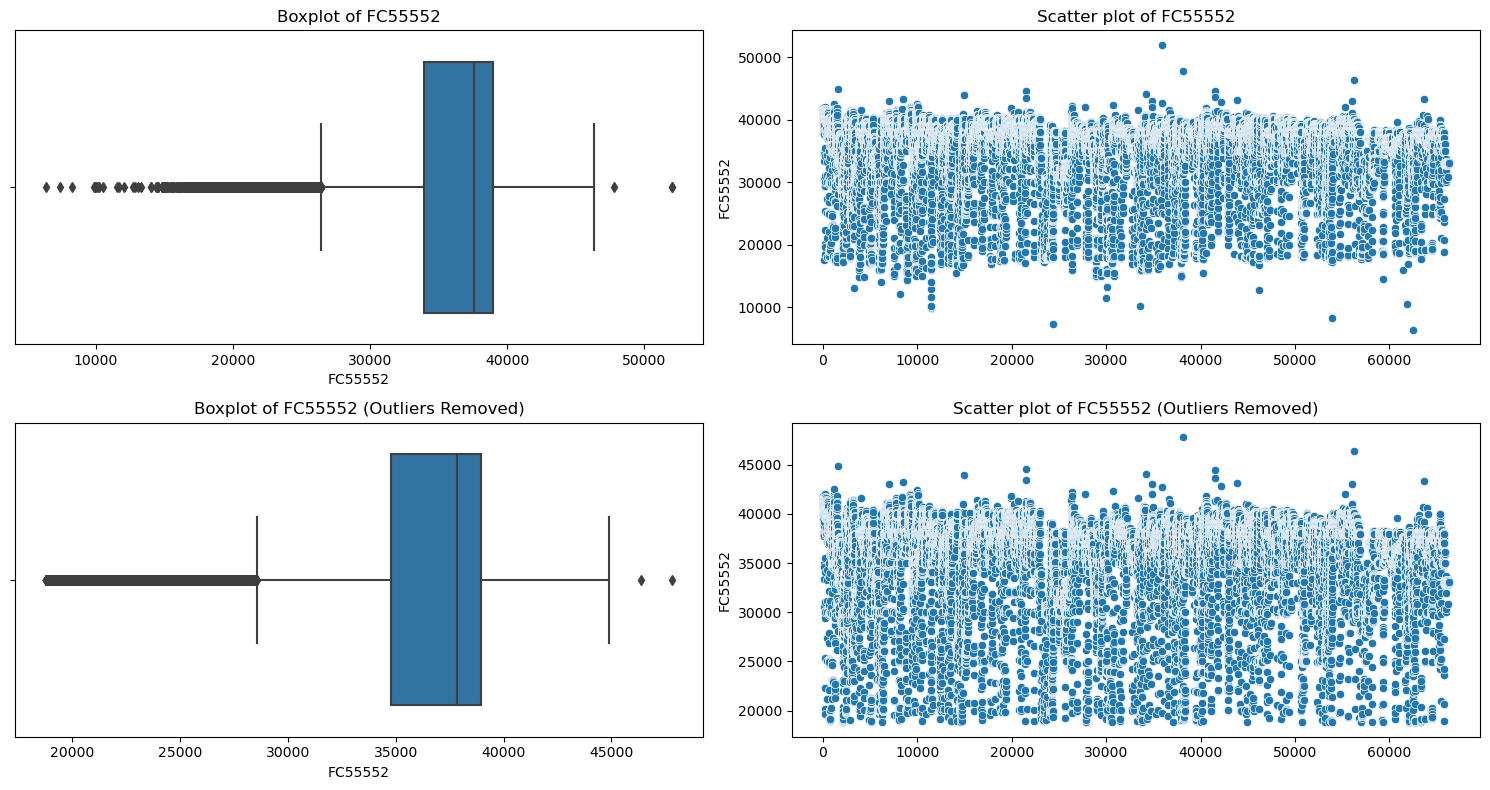

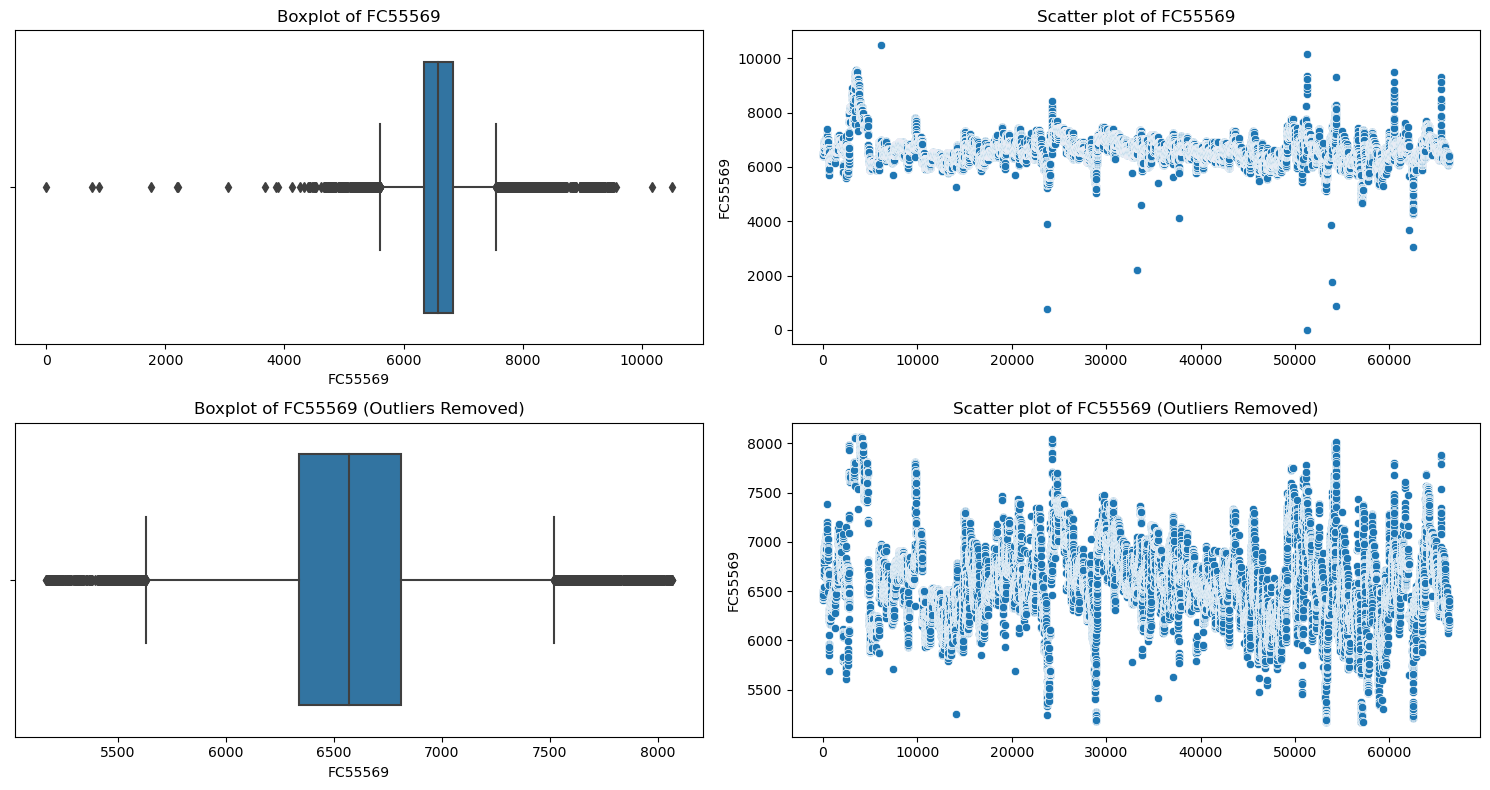

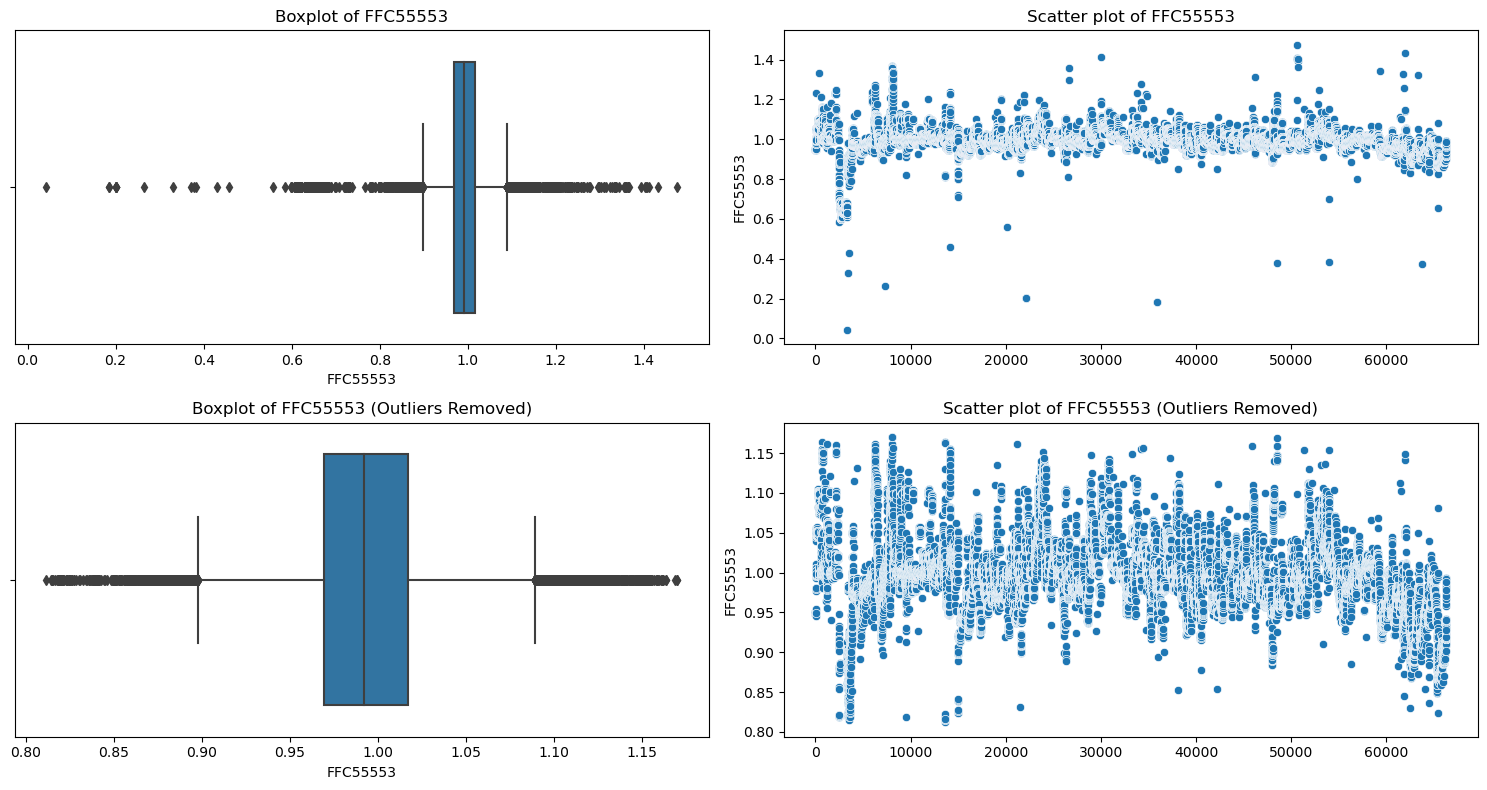

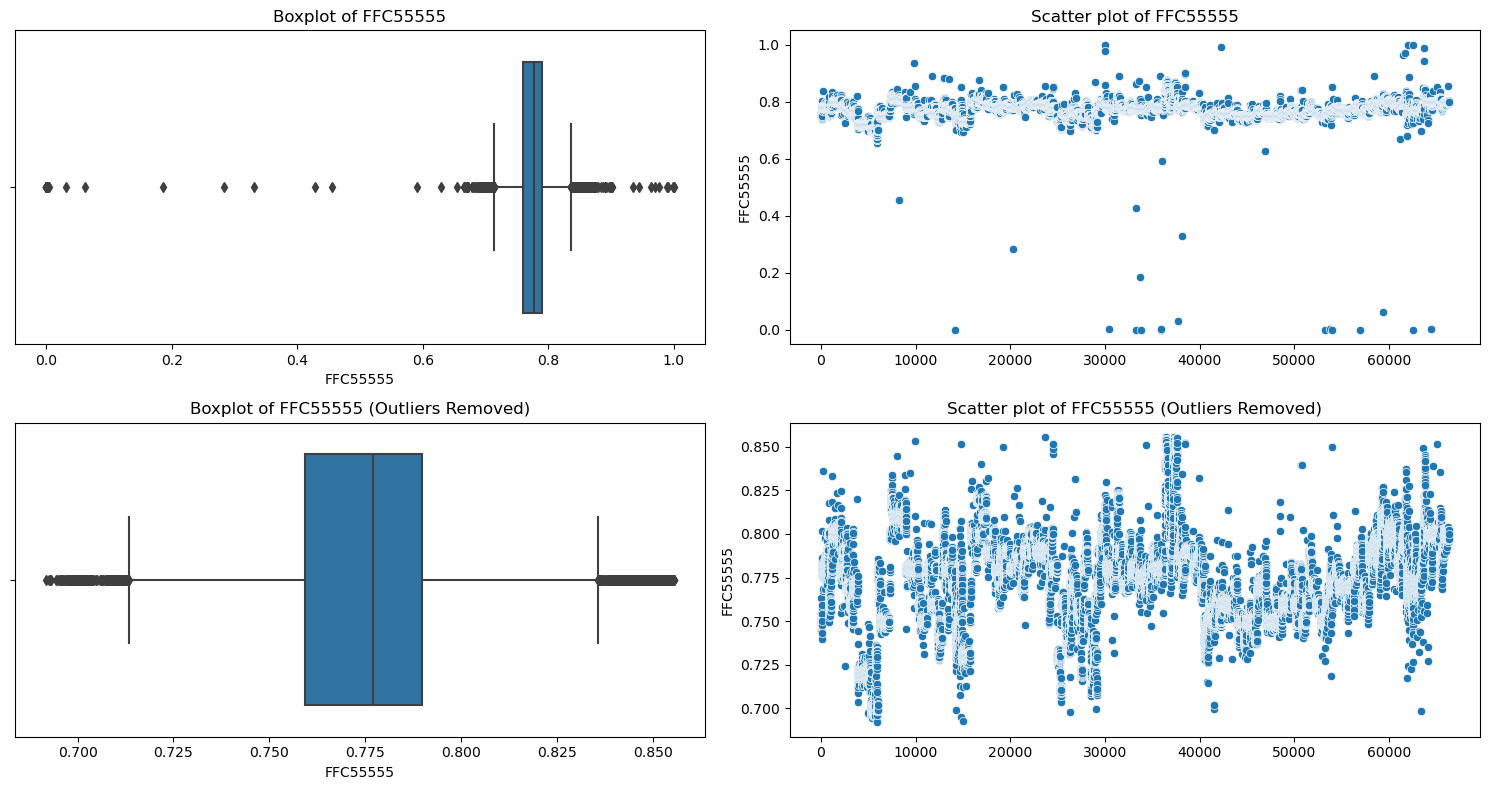

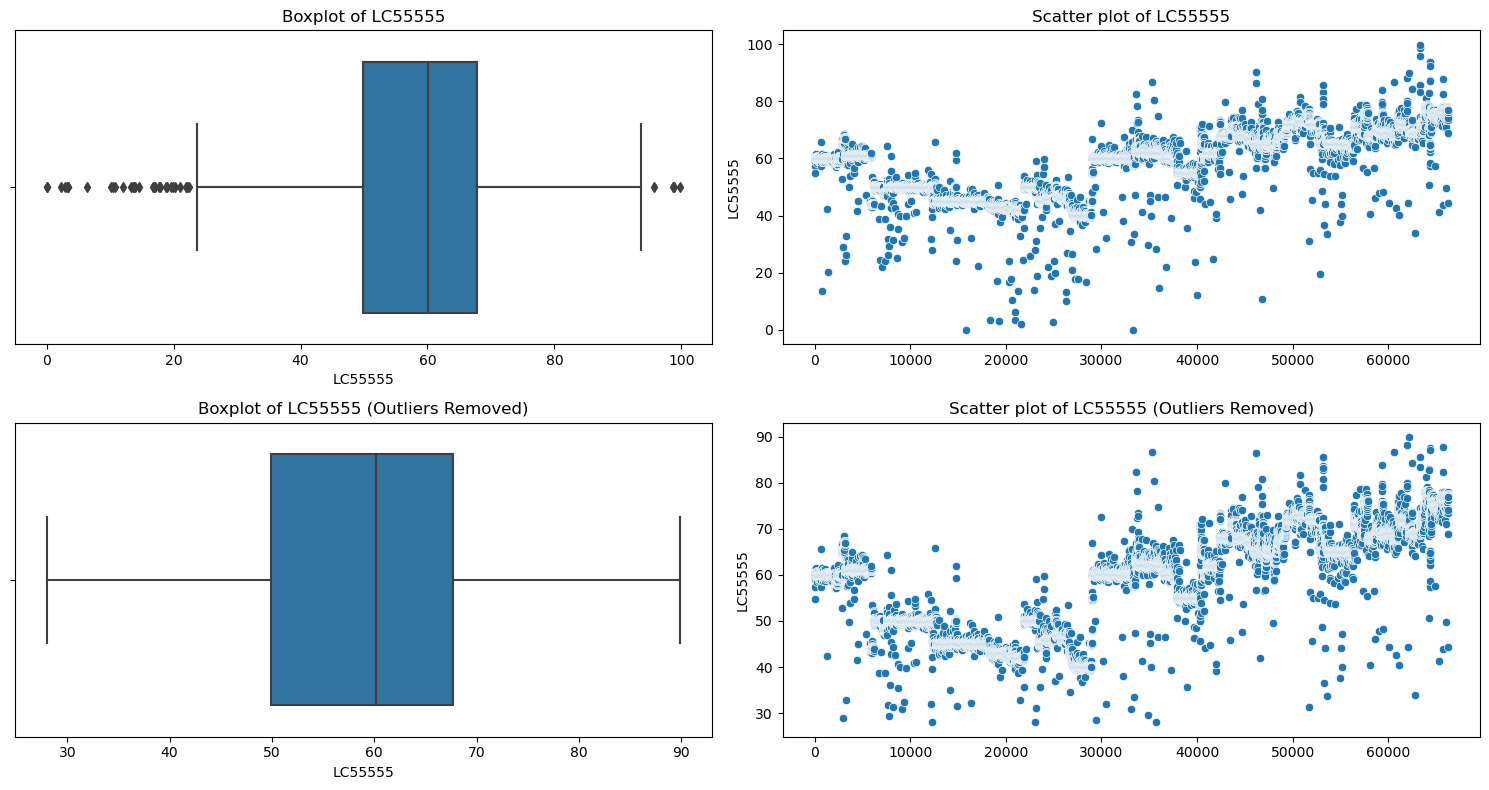

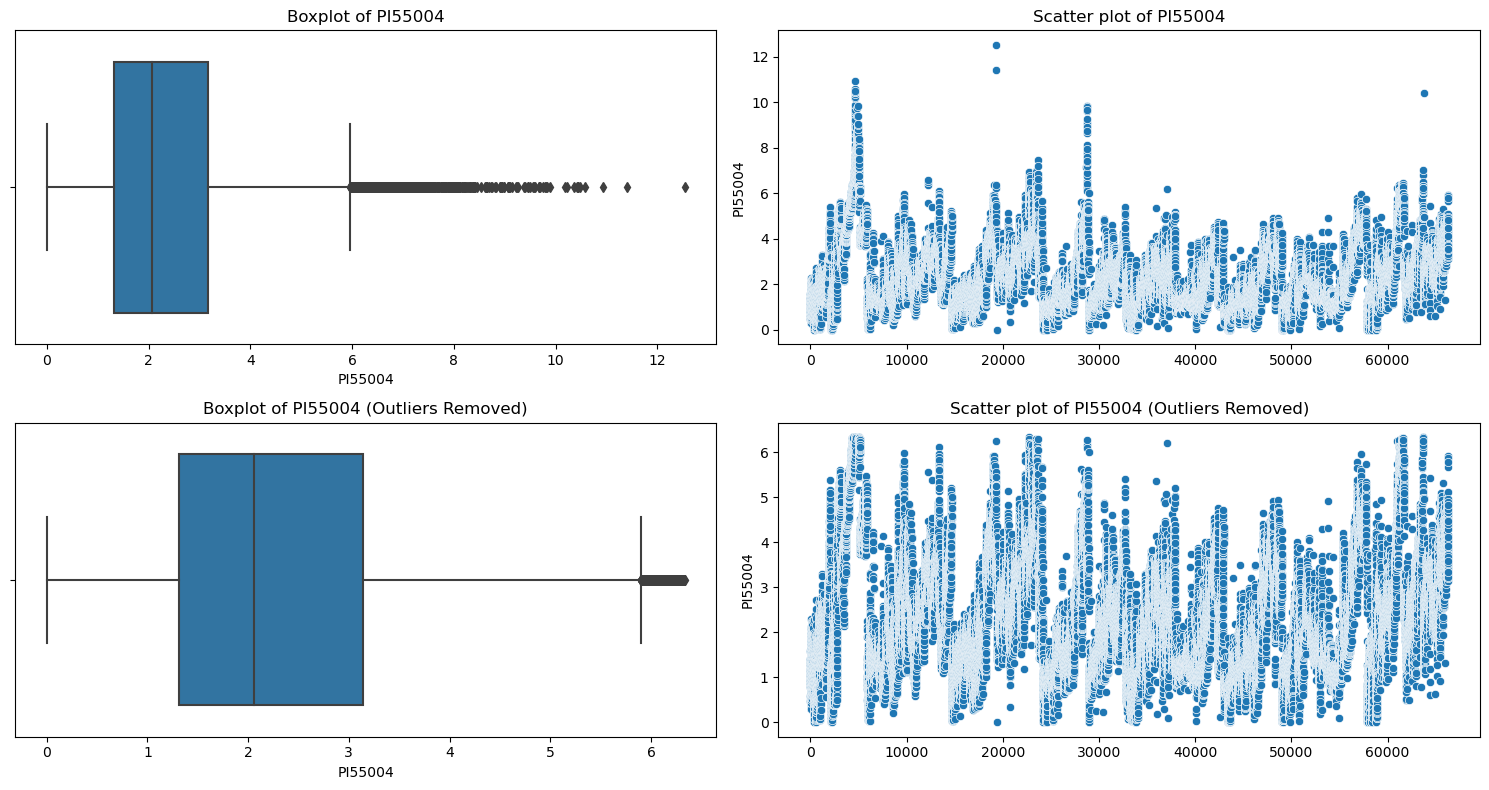

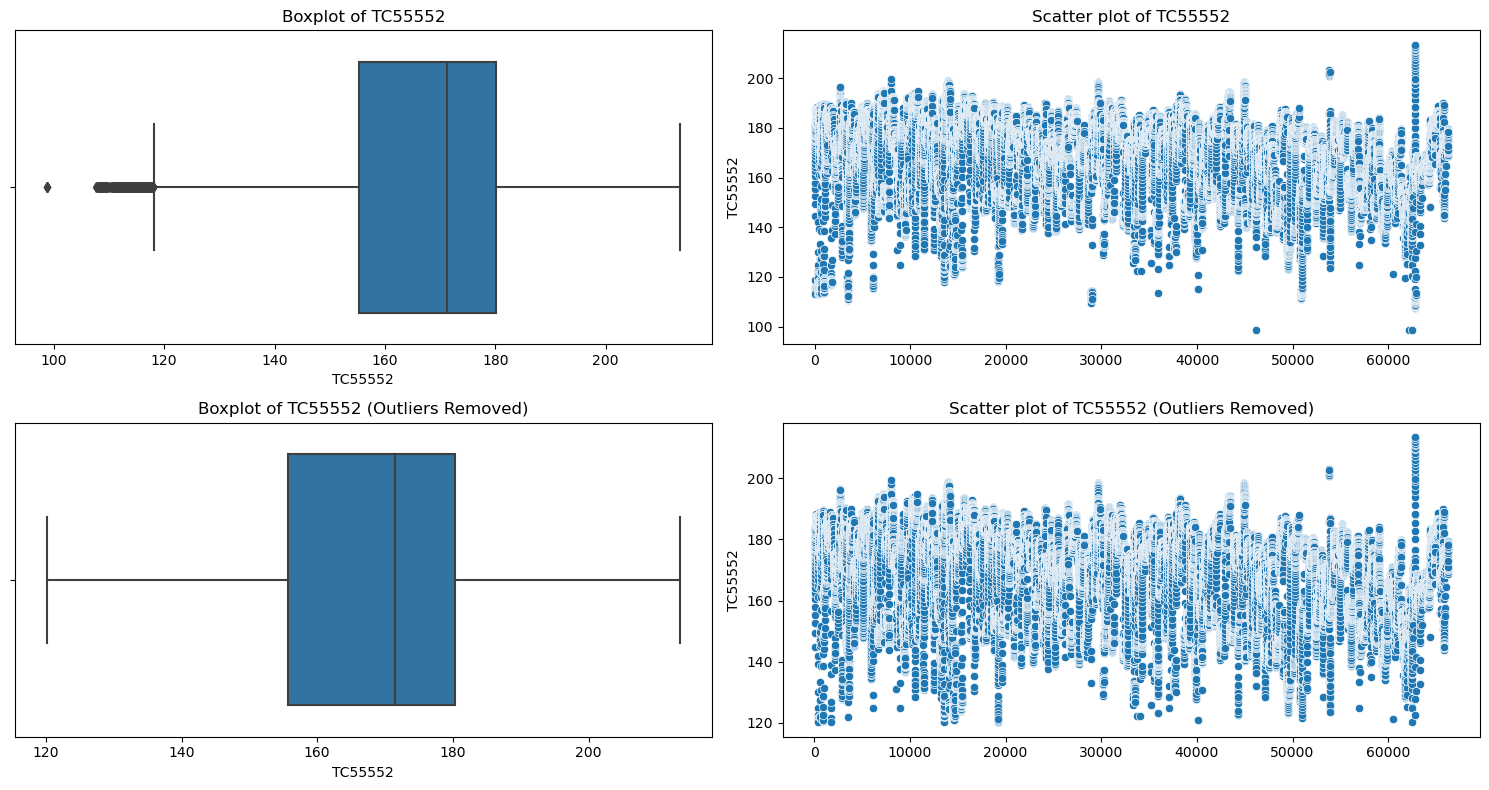

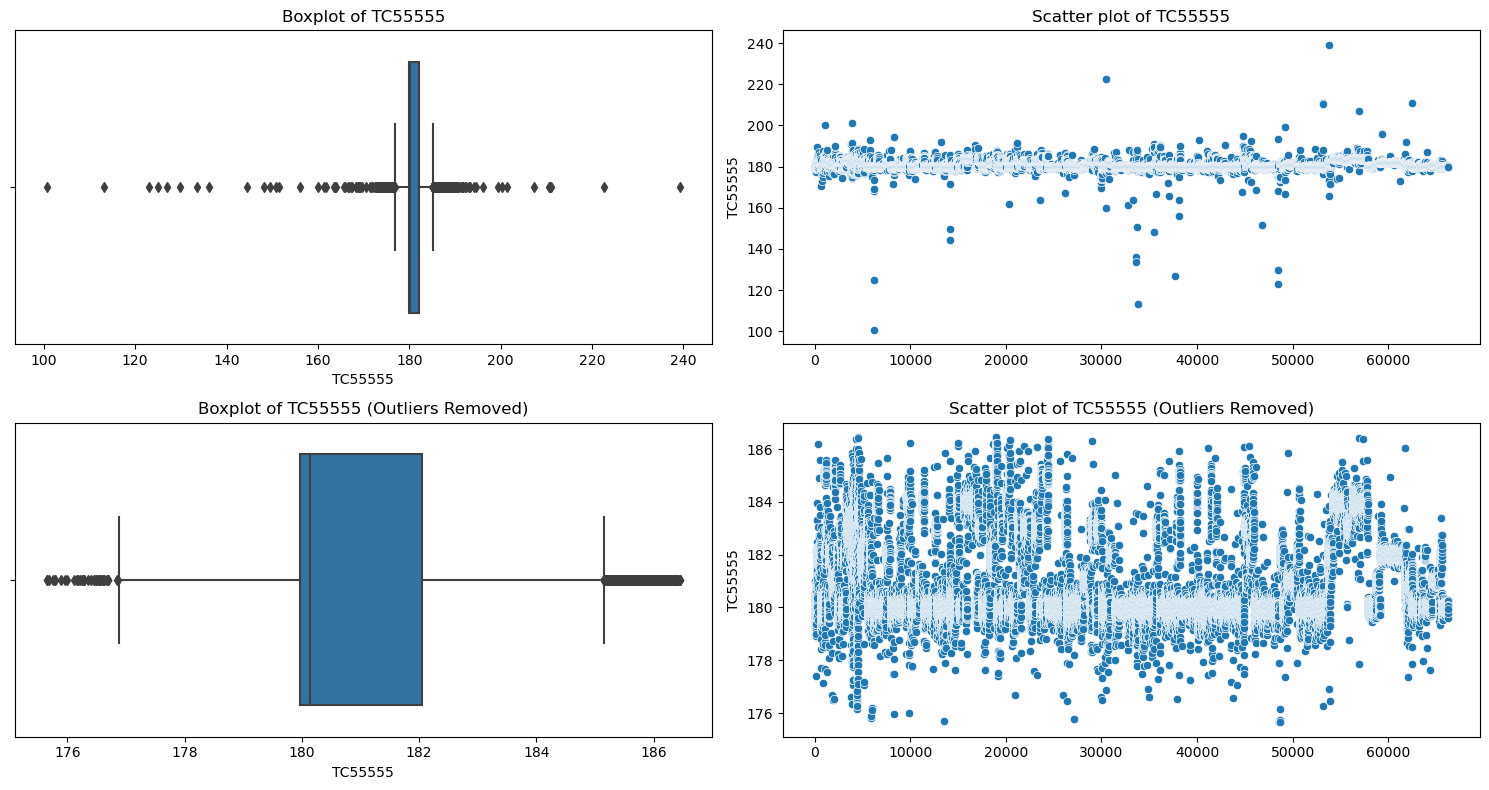

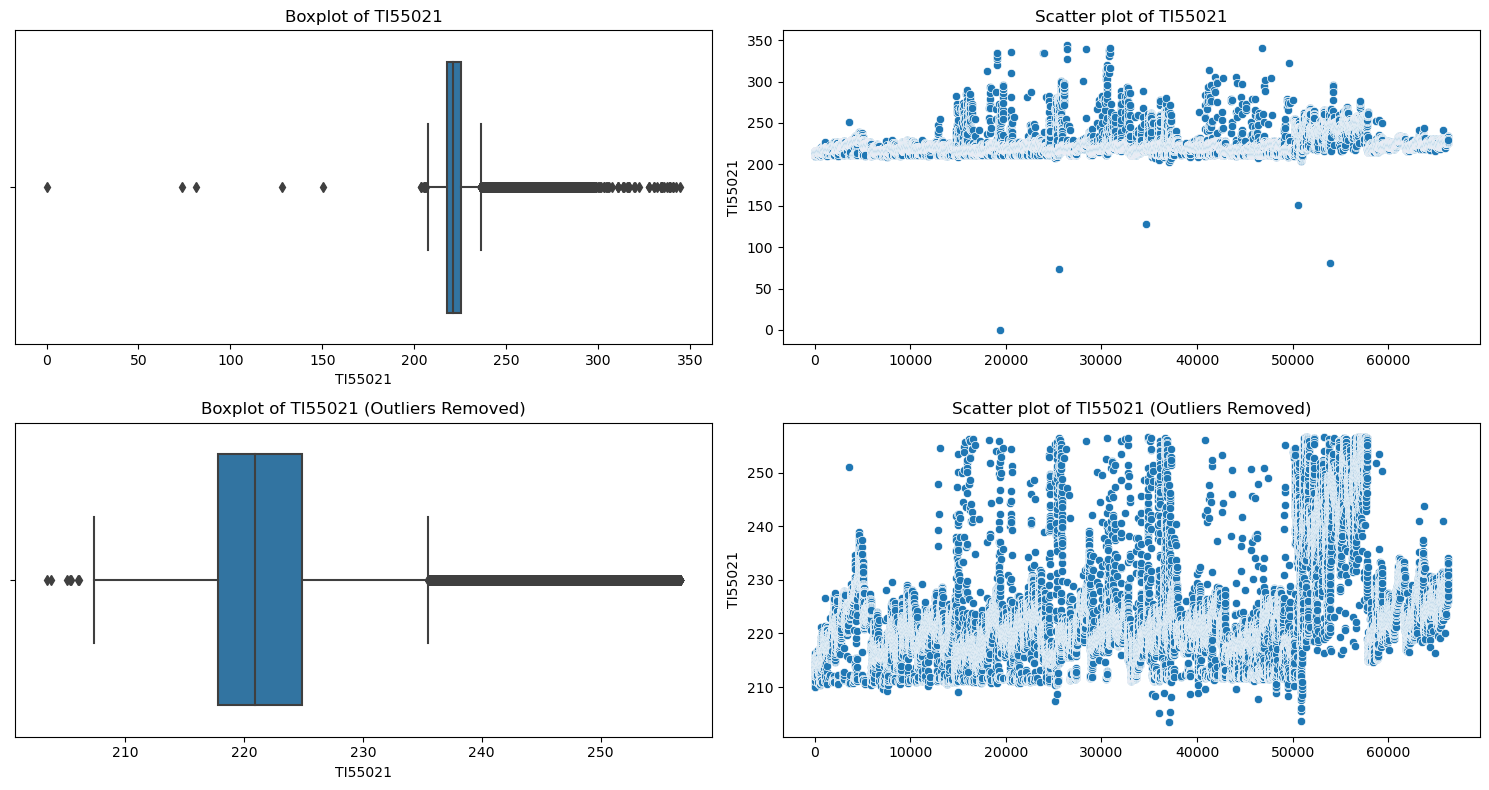

In [7]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [8]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [9]:
df_outlierHandling = df_plotted_Outliers_removed.copy()







In [10]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       66283          66260         23        0.034700
1              M_Value       66283          65947        336        0.506917
2           C4_pct_Eth       66283          66133        150        0.226302
3           C4_pct_H2O       66283          65815        468        0.706063
4           C4_pct_Hex       66283          65384        899        1.356306
5              Butanol       66283          64143       2140        3.228580
6   HydWtr_pct_Ammonia       66283          65043       1240        1.870766
7          HydWtr_Na2O       66283          66020        263        0.396783
8              DI55152       66283          66212         71        0.107116
9              FC55003       66283          65411        872        1.315571
10             FC55552       66283          64198       2085        3.145603
11             FC55569       66283          65041       1242        1.873784

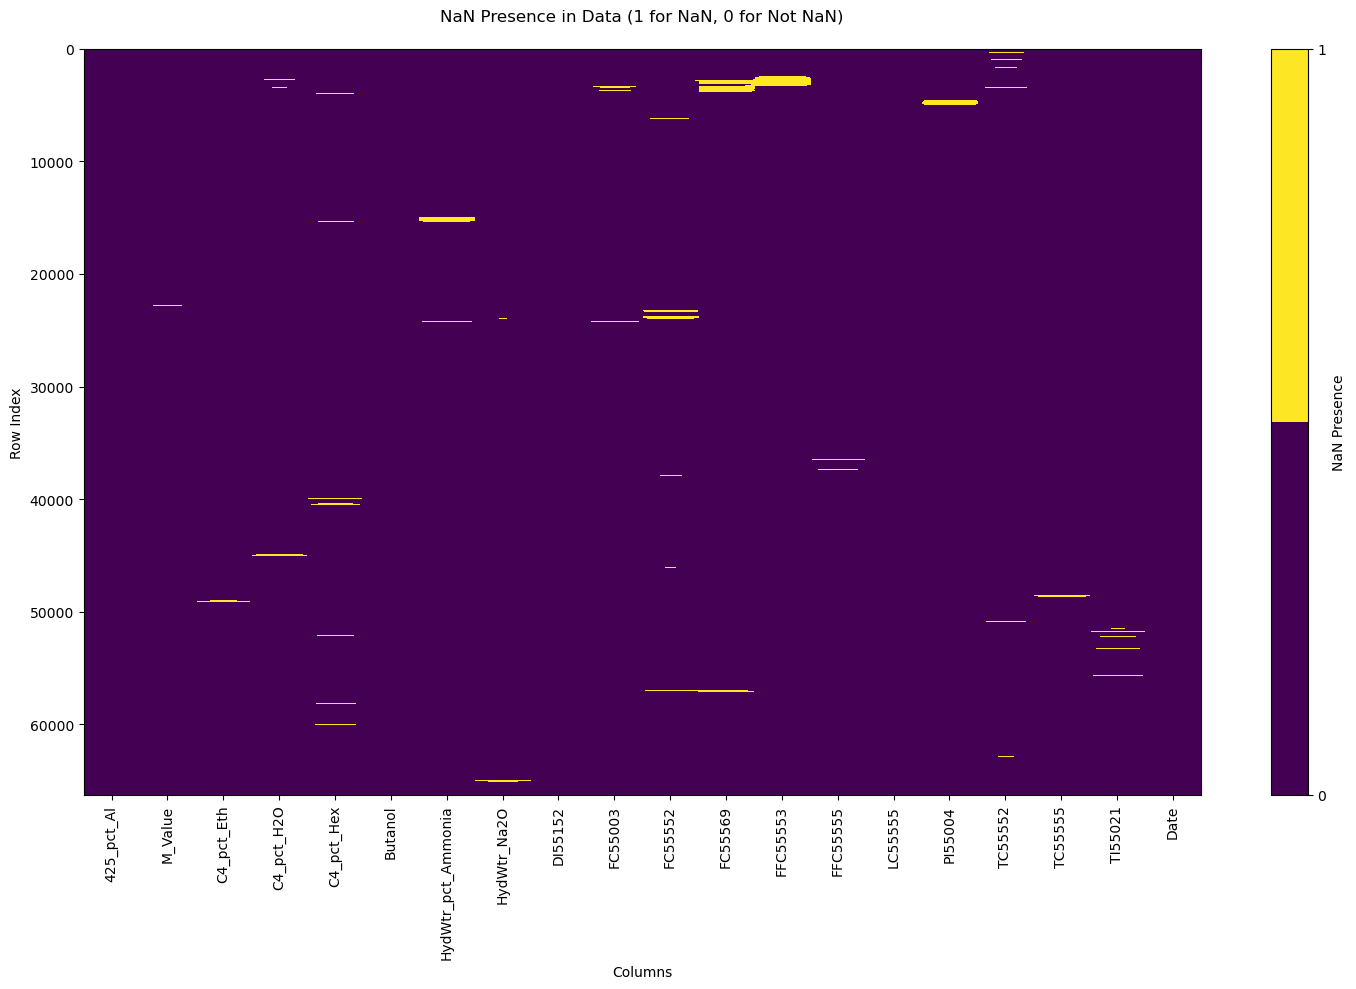

In [11]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [12]:
df_outlierHandling = df_outlierHandling.dropna().copy()



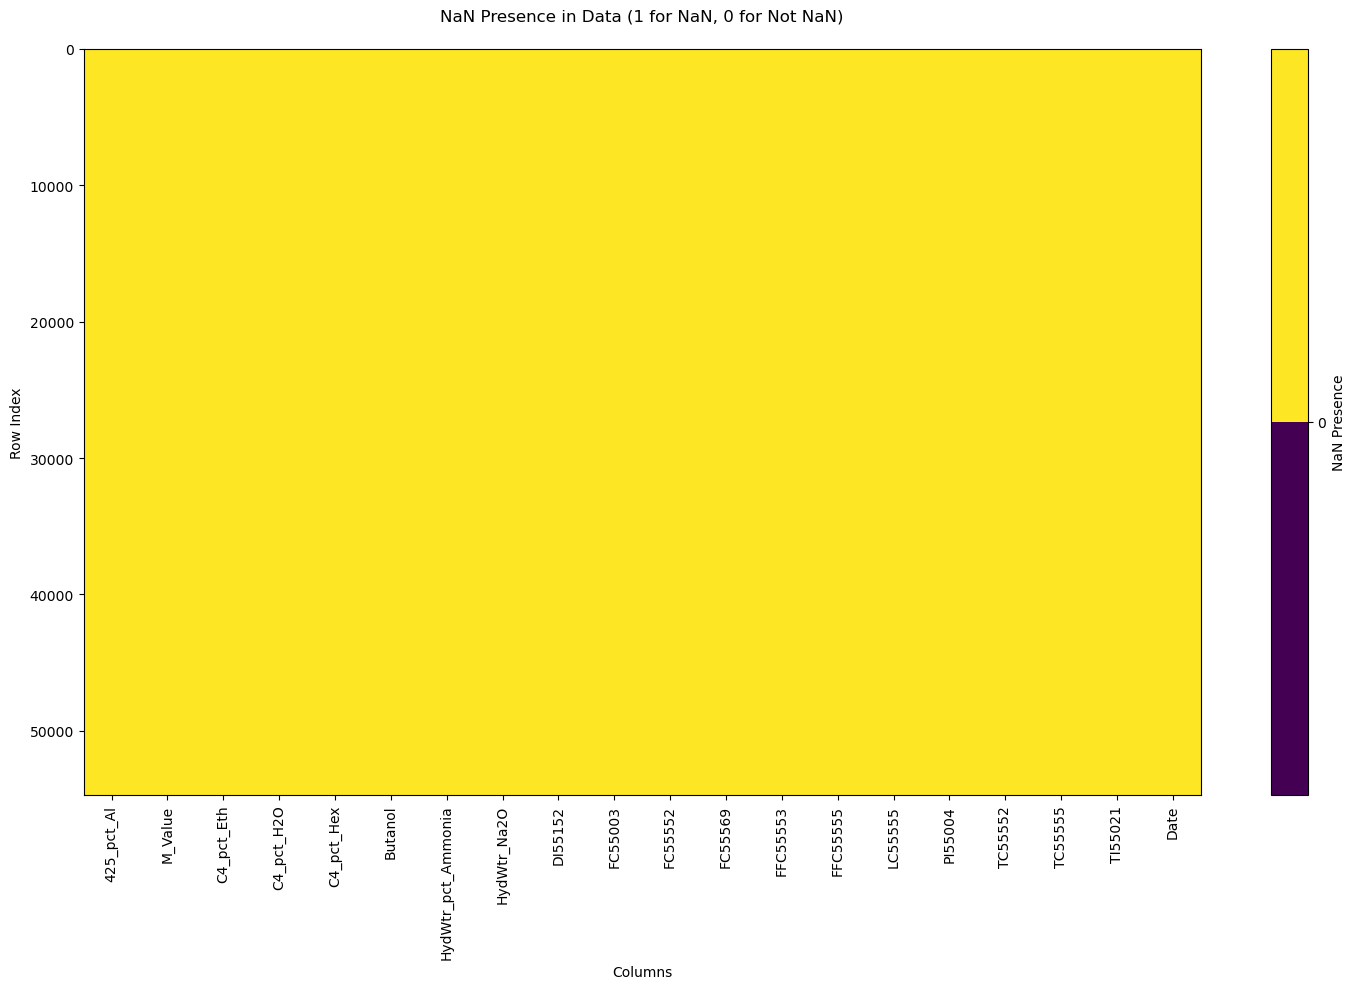

In [13]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [14]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       54701          54701          0             0.0
1              M_Value       54701          54701          0             0.0
2           C4_pct_Eth       54701          54701          0             0.0
3           C4_pct_H2O       54701          54701          0             0.0
4           C4_pct_Hex       54701          54701          0             0.0
5              Butanol       54701          54701          0             0.0
6   HydWtr_pct_Ammonia       54701          54701          0             0.0
7          HydWtr_Na2O       54701          54701          0             0.0
8              DI55152       54701          54701          0             0.0
9              FC55003       54701          54701          0             0.0
10             FC55552       54701          54701          0             0.0
11             FC55569       54701          54701          0             0.0

In [15]:
# 54701
# 54012
# 49239 - All Features

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)




Number of features: 20


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [16]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [17]:
df_outlierHandling.to_csv('contData_clean.csv', index=False)

df_outlierHandling.columns

Index(['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O', 'C4_pct_Hex',
       'Butanol', 'HydWtr_pct_Ammonia', 'HydWtr_Na2O', 'DI55152', 'FC55003',
       'FC55552', 'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 'PI55004',
       'TC55552', 'TC55555', 'TI55021', 'Date'],
      dtype='object')

In [19]:
saoSelect = ['Date', '425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O', 'C4_pct_Hex','HydWtr_pct_Ammonia', 'HydWtr_Na2O']

fb554Select = ['Date', 'Butanol'] # , 'Decanol', 'Ethanol', 'Hexanol', 'Octanol'

unitSelect = ['Date', 'DI55152', 'FC55003', 'FC55552', 
              'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 
              'PI55004', 'TC55552', 'TC55555', 'TI55021']

            # ['Date', 'DI55102', 'DI55152', 'DI55580', 'FC42428',
            #    'FC55003', 'FC55552', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555',
            #    'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'LC90366',
            #    'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553', 'TC55555']

            #   ['Date', 'AYC55580', 'DI55102', 'DI55152', 'DI55580', 'FC42428', 'FC52018',
            #   'FC55003', 'FC55009', 'FC55102', 'FC55152', 'FC55552', 'FC55555', 'FC55569', 
            #   'FC55576', 'FFC55553', 'FFC55555', 'FYC55553', 'II52554', 'LC52572', 'LC55553', 
            #   'LC55555', 'LC55557', 'LC55568', 'LC90366', 'LC90368', 'PI55004', 'PI55020', 
            #   'PI55560', 'TC52015', 'TC55552', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 
            #   'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 
            #   'TI55023','VI52558B']

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()



df_clean_554.to_csv('cont_554Data_clean.csv', index=False)

df_clean_425.to_csv('cont_425Data_clean.csv', index=False)

df_clean_unit.to_csv('cont_unitData_clean.csv', index=False)